In [17]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#this will make your plot outputs appear and be stored within the notebook

In [19]:
exams= pd.read_csv('files/exams.csv')
exams.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [20]:
#check the data type
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
#check no of rows and columns
exams.shape

(1000, 8)

In [22]:
#Basic Analysis
exams.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [23]:
#lets check na values
exams.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [24]:
exams.isna().sum().sum() #there is no missing data so no need to drop any values

0

In [32]:
#tell me no of females and no males in data
exams['gender'].value_counts() #females are more than male in this data

male      517
female    483
Name: gender, dtype: int64

In [35]:
exams.iloc[:,1].value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

In [36]:
exams.iloc[:,3].value_counts()

standard        652
free/reduced    348
Name: lunch, dtype: int64

In [43]:
#check the same for parental level education
#Male Vs Female
#see whoc is better in math, reading , writing
female=exams[exams['gender']=='female']
male=exams[exams['gender']=='male']
print("Math")
print("Male ",round(male['math score'].sum()/len(male),3))
print("Feale ",round(female['math score'].sum()/len(female),3))

print("Reading")
print("Male ",round(male['reading score'].sum()/len(male),3))
print("Female ",round(female['reading score'].sum()/len(female),3))

print("Writing")
print("Male ",round(male['writing score'].sum()/len(male),3))
print("Female ",round(female['writing score'].sum()/len(female),3))

Math
Male  69.385
Feale  63.197
Reading
Male  66.306
Female  71.888
Writing
Male  64.029
Female  71.708


In [46]:
#top 30 students
#total scores
scores= pd.DataFrame(exams['math score']+exams['reading score']+exams['writing score'],columns=['total'])
scores= pd.merge(exams,scores,left_index=True,right_index=True).sort_values(by=['total'],ascending=False)
scores.head(30)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
148,female,group E,bachelor's degree,standard,completed,100,100,100,300
550,female,group E,some college,standard,completed,100,100,100,300
825,male,group E,associate's degree,standard,completed,100,100,100,300
634,female,group D,master's degree,standard,completed,100,100,100,300
281,male,group E,associate's degree,standard,completed,100,100,100,300
593,male,group D,bachelor's degree,standard,completed,100,97,100,297
96,female,group E,associate's degree,standard,completed,95,100,100,295
754,female,group A,master's degree,standard,completed,94,100,100,294
626,female,group B,master's degree,standard,completed,96,98,100,294
816,female,group C,associate's degree,standard,completed,94,99,100,293


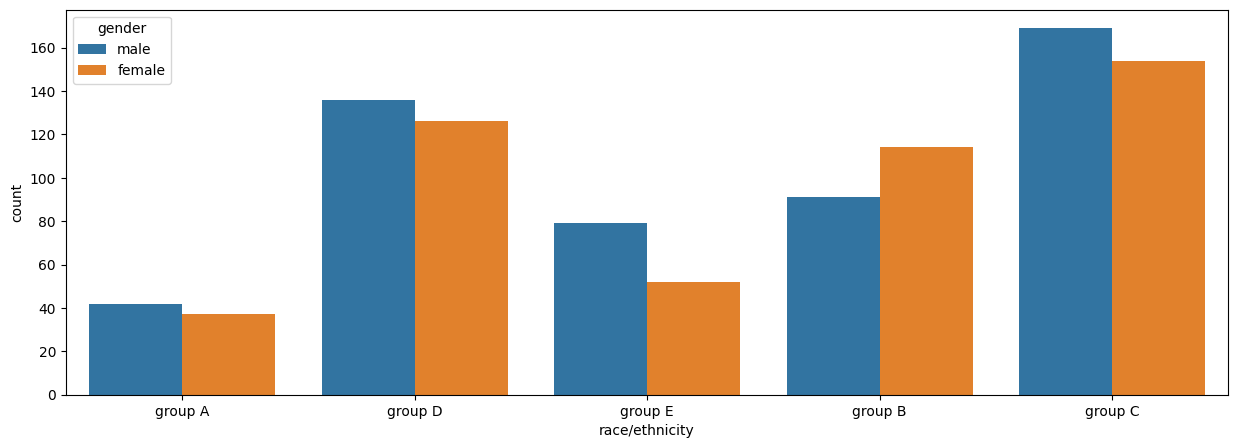

In [52]:
#Data Visualization
f, ax= plt.subplots(1,1,figsize = (15,5))
sns.countplot(x='race/ethnicity',data=exams,hue='gender')

plt.show()

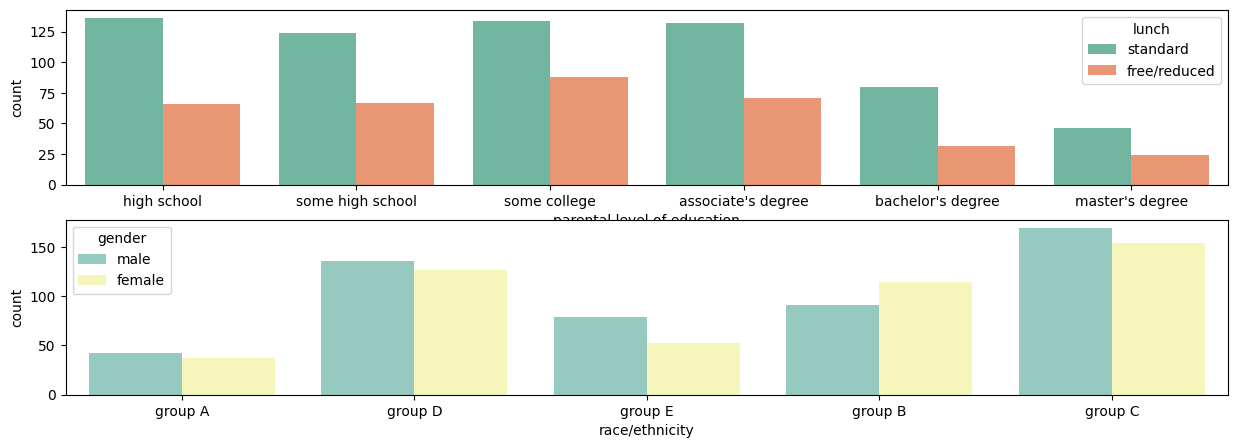

In [59]:
f, axs= plt.subplots(2,1,figsize = (15,5))
sns.countplot(x='parental level of education',data=exams,hue='lunch',ax=axs[0],palette="Set2")
sns.countplot(x='race/ethnicity',data=exams,hue='gender',ax=axs[1],palette="Set3")

plt.show()

In [57]:
sns.color_palette('Set3')

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

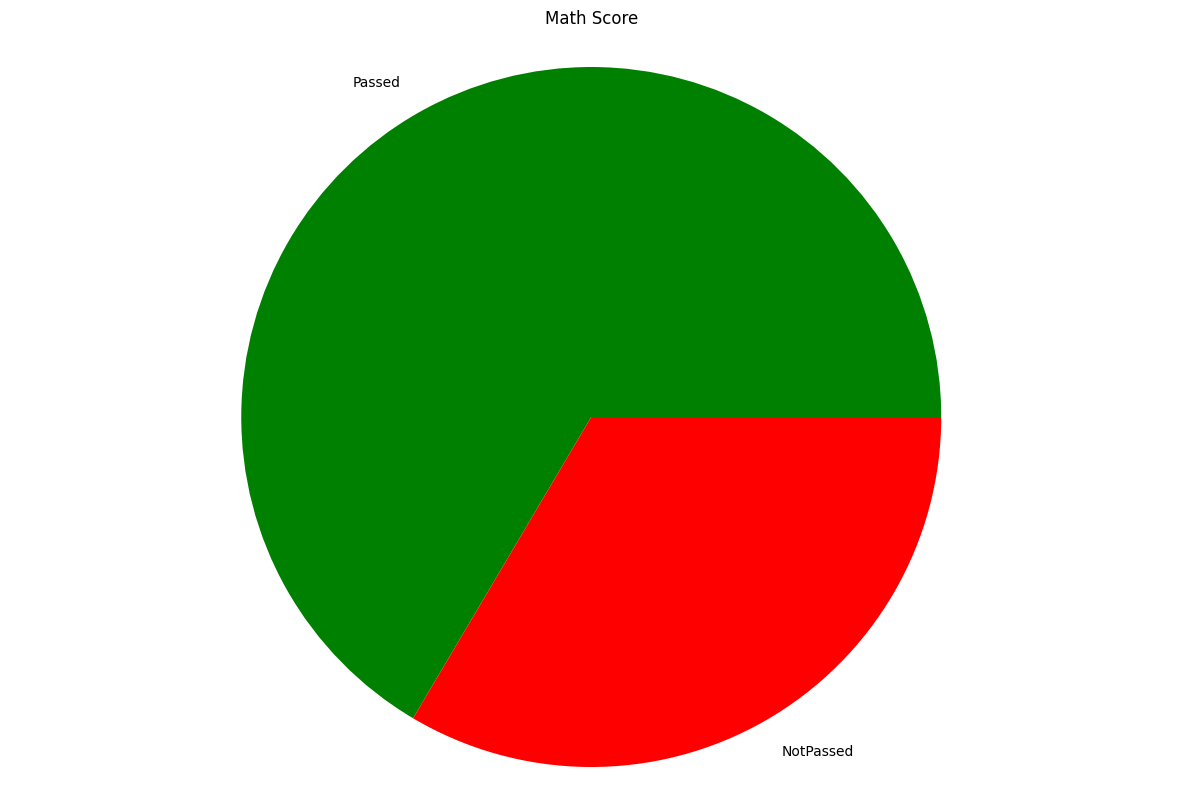

In [63]:
#math Score
passed= len(exams[exams['math score']>=60])
not_passed= 1000-passed

percentagemath=[passed,not_passed]

labels= "Passed","NotPassed"

f, axs= plt.subplots(1,1,figsize=(15,10))

axs.pie(percentagemath,labels=labels, colors =['green','red'])
axs.set_title("Math Score")
axs.axis('equal')
plt.show()